<a href="https://colab.research.google.com/github/fatemehKi/Fake_News_Detection/blob/master/Copy_of_Fake_News_Detection_pro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***


In [0]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [0]:
nltk.download()
import nltk

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

# ***Loding Data Set***

In [0]:
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
df=pd.read_csv('data.csv')

# ***Data Frame Overview***

In [0]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [0]:
print(df.duplicated().sum())

0


In [0]:
print(df.isnull().sum())

URLs         0
Headline     0
Body        21
Label        0
dtype: int64


# ***Data Cleaning***


In [0]:
df=df.dropna()
print(df.isnull().sum())

URLs        0
Headline    0
Body        0
Label       0
dtype: int64


# ***Data Exploration (EDA) - Text Mining***

In [0]:
df['NEWS_WEB'] = [x.split('/')[2] for x in df.URLs]

In [0]:
df.head()

,URLs,Headline,Body,Label,NEWS_WEB
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,www.bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,www.reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,www.nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,www.reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,www.cnn.com


In [0]:
grouped=df.groupby('NEWS_WEB').Label.value_counts()

In [0]:
print(grouped)

NEWS_WEB                   Label
abcnews.go.com             1          57
api.content-ad.net         0           2
beforeitsnews.com          0        1681
bleacherreport.com         1           8
clarivate.com              1           3
cnn.it                     1           1
dailybuzzlive.com          0          99
edition.cnn.com            1          15
inhealth.cnn.com           1          14
money.cnn.com              1          49
reuters.com                1           1
thelab.bleacherreport.com  1           1
www.activistpost.com       0         267
www.bbc.co.uk              1          10
www.bbc.com                1         333
www.cnn.com                1         389
www.disclose.tv            0          71
www.nytimes.com            1         341
www.reuters.com            1         646
Name: Label, dtype: int64


In [0]:
group_df=pd.DataFrame({'count' : df.groupby('NEWS_WEB').size()}).reset_index()

In [0]:
group_df

,NEWS_WEB,count
0,abcnews.go.com,57
1,api.content-ad.net,2
2,beforeitsnews.com,1681
3,bleacherreport.com,8
4,clarivate.com,3
5,cnn.it,1
6,dailybuzzlive.com,99
7,edition.cnn.com,15
8,inhealth.cnn.com,14
9,money.cnn.com,49


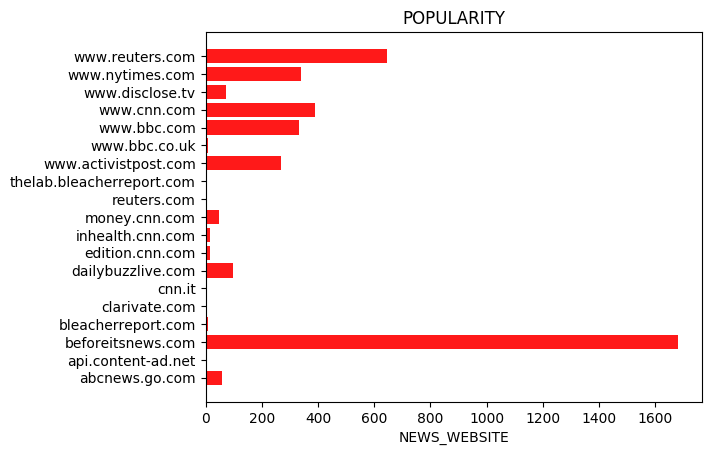

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
NEWS_WEBSITE = group_df['NEWS_WEB']
y_pos = np.arange(len(NEWS_WEBSITE))
POPULARITY = group_df['count']

plt.barh(y_pos, POPULARITY, align='center', alpha=0.9, color='red')
plt.yticks(y_pos, NEWS_WEBSITE)
plt.xlabel('NEWS_WEBSITE')
plt.title('POPULARITY')

plt.show()

In [0]:
df['news'] = df.Headline + df.Body


In [0]:
X_real=df.news[df.Label=='yes']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


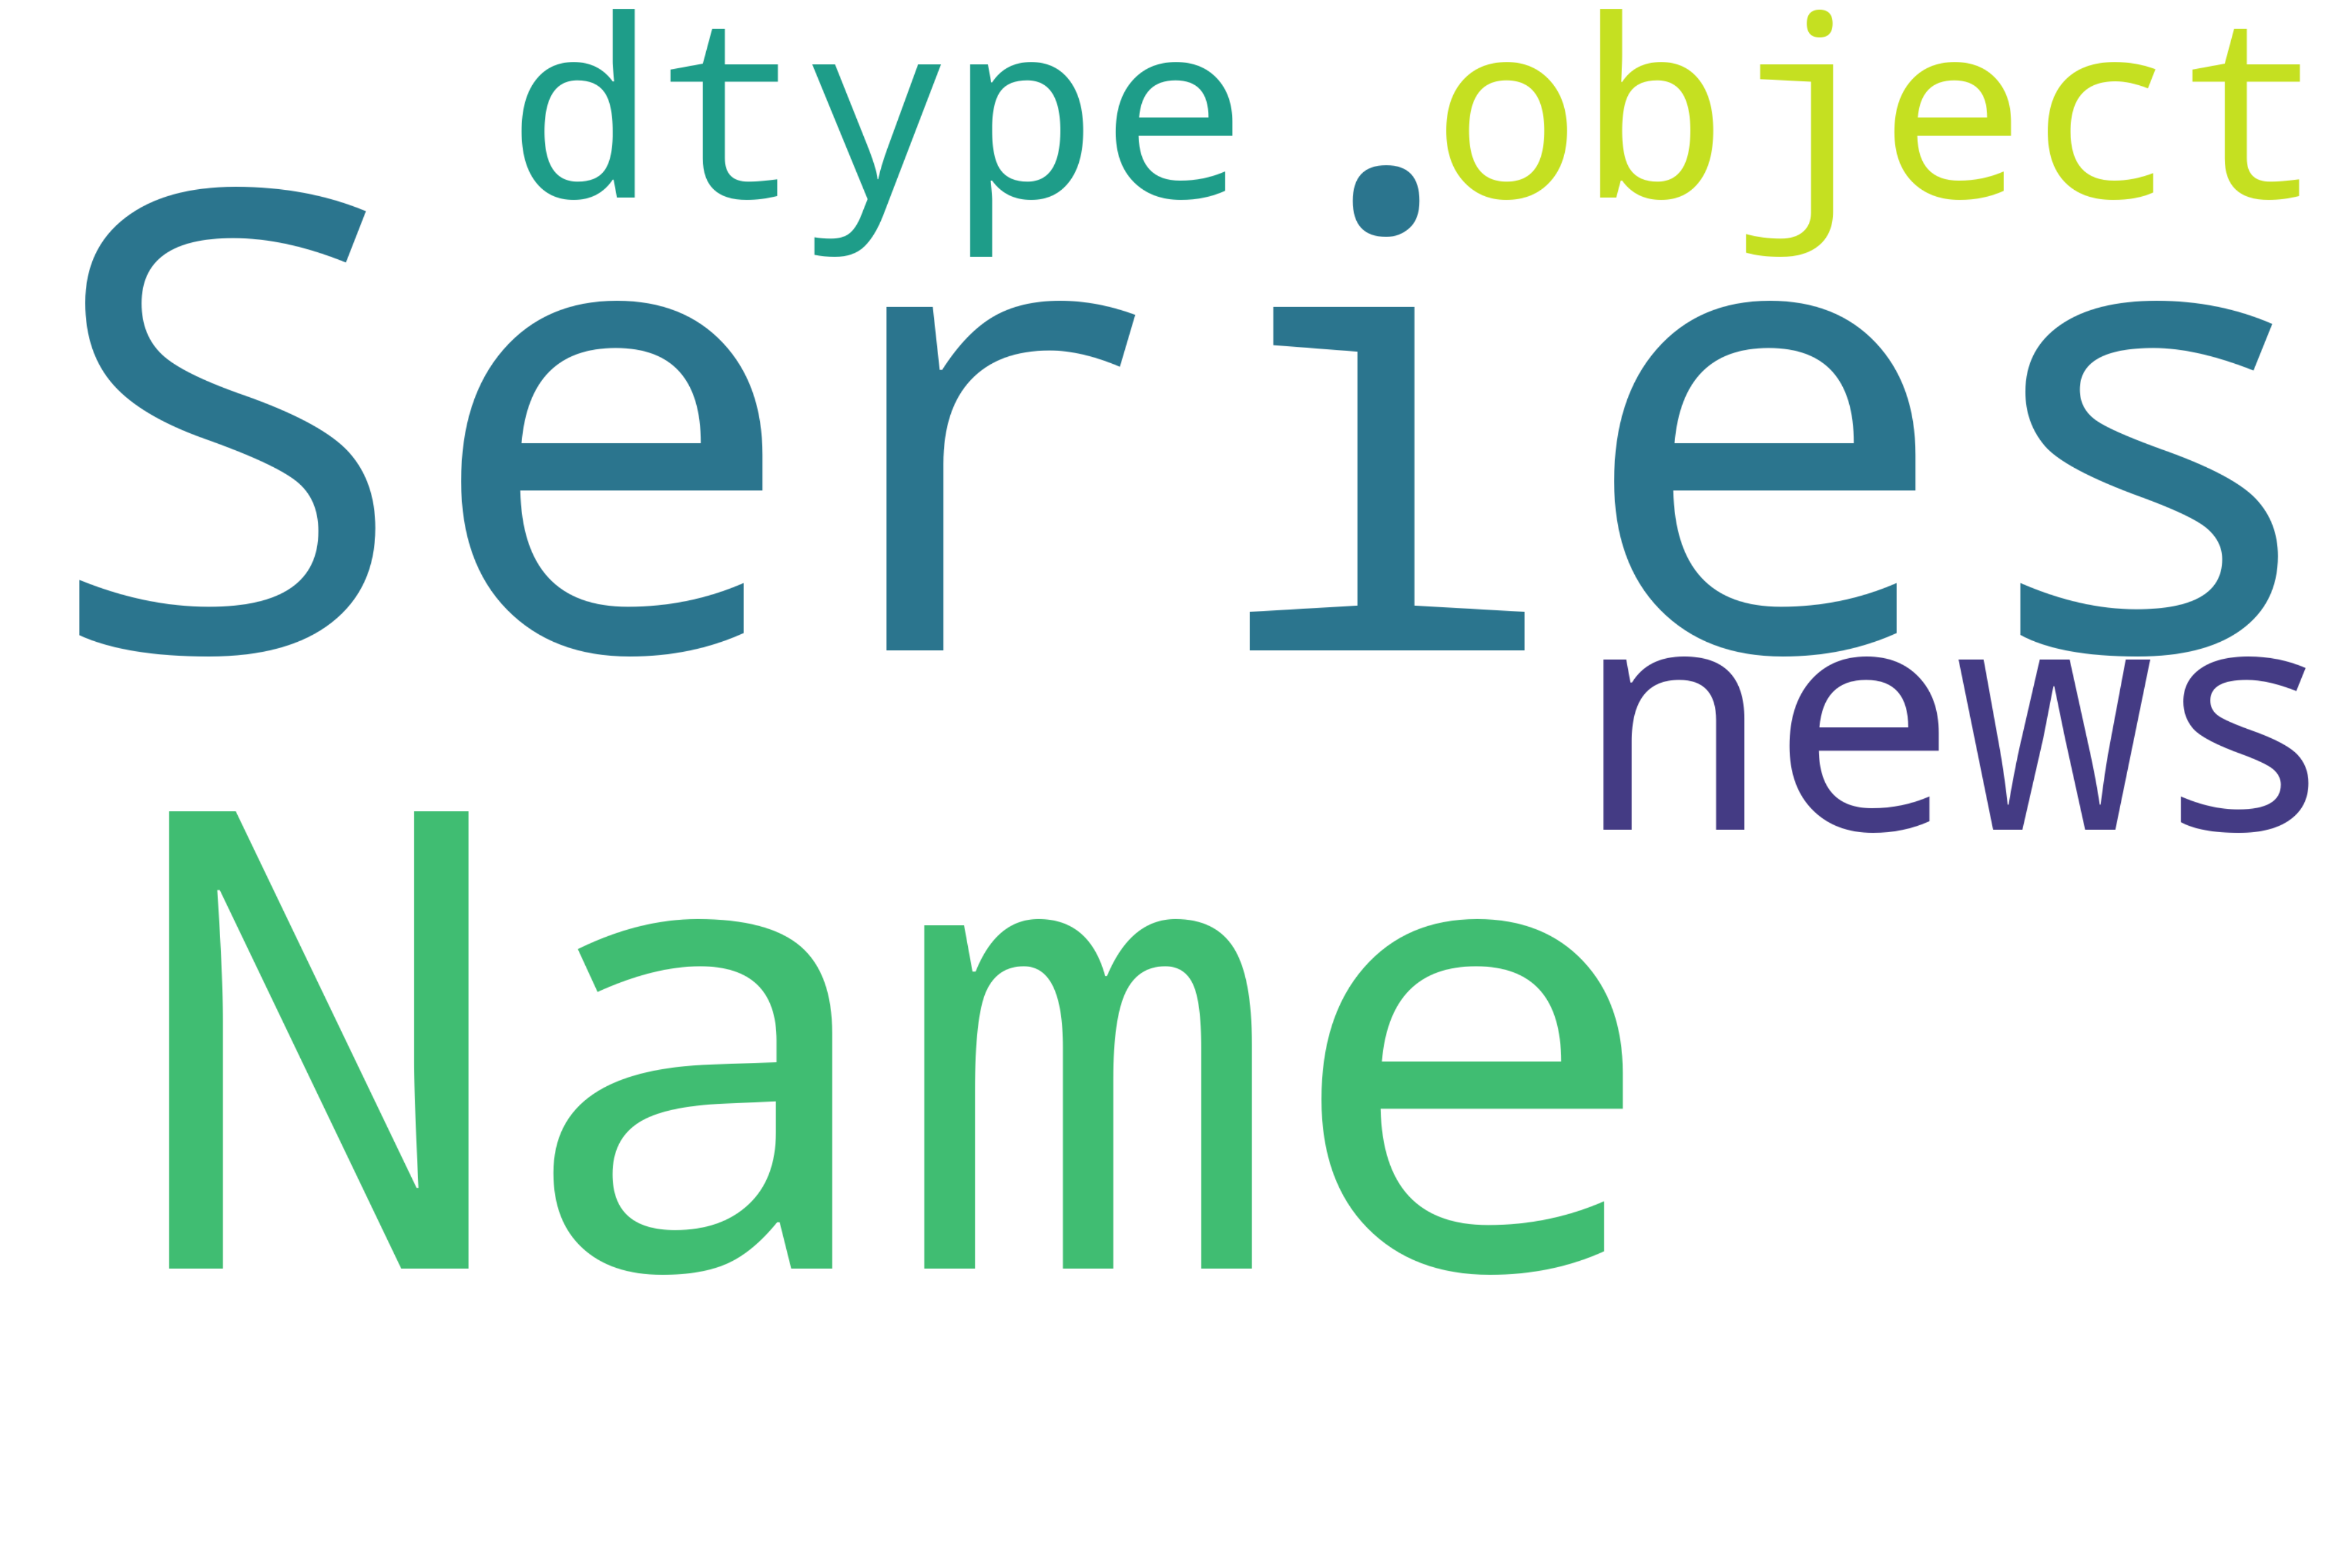

In [0]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt
text = X_real
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
X_fake=df.news[df.Label=='no']
X_fake

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: news, dtype: object)

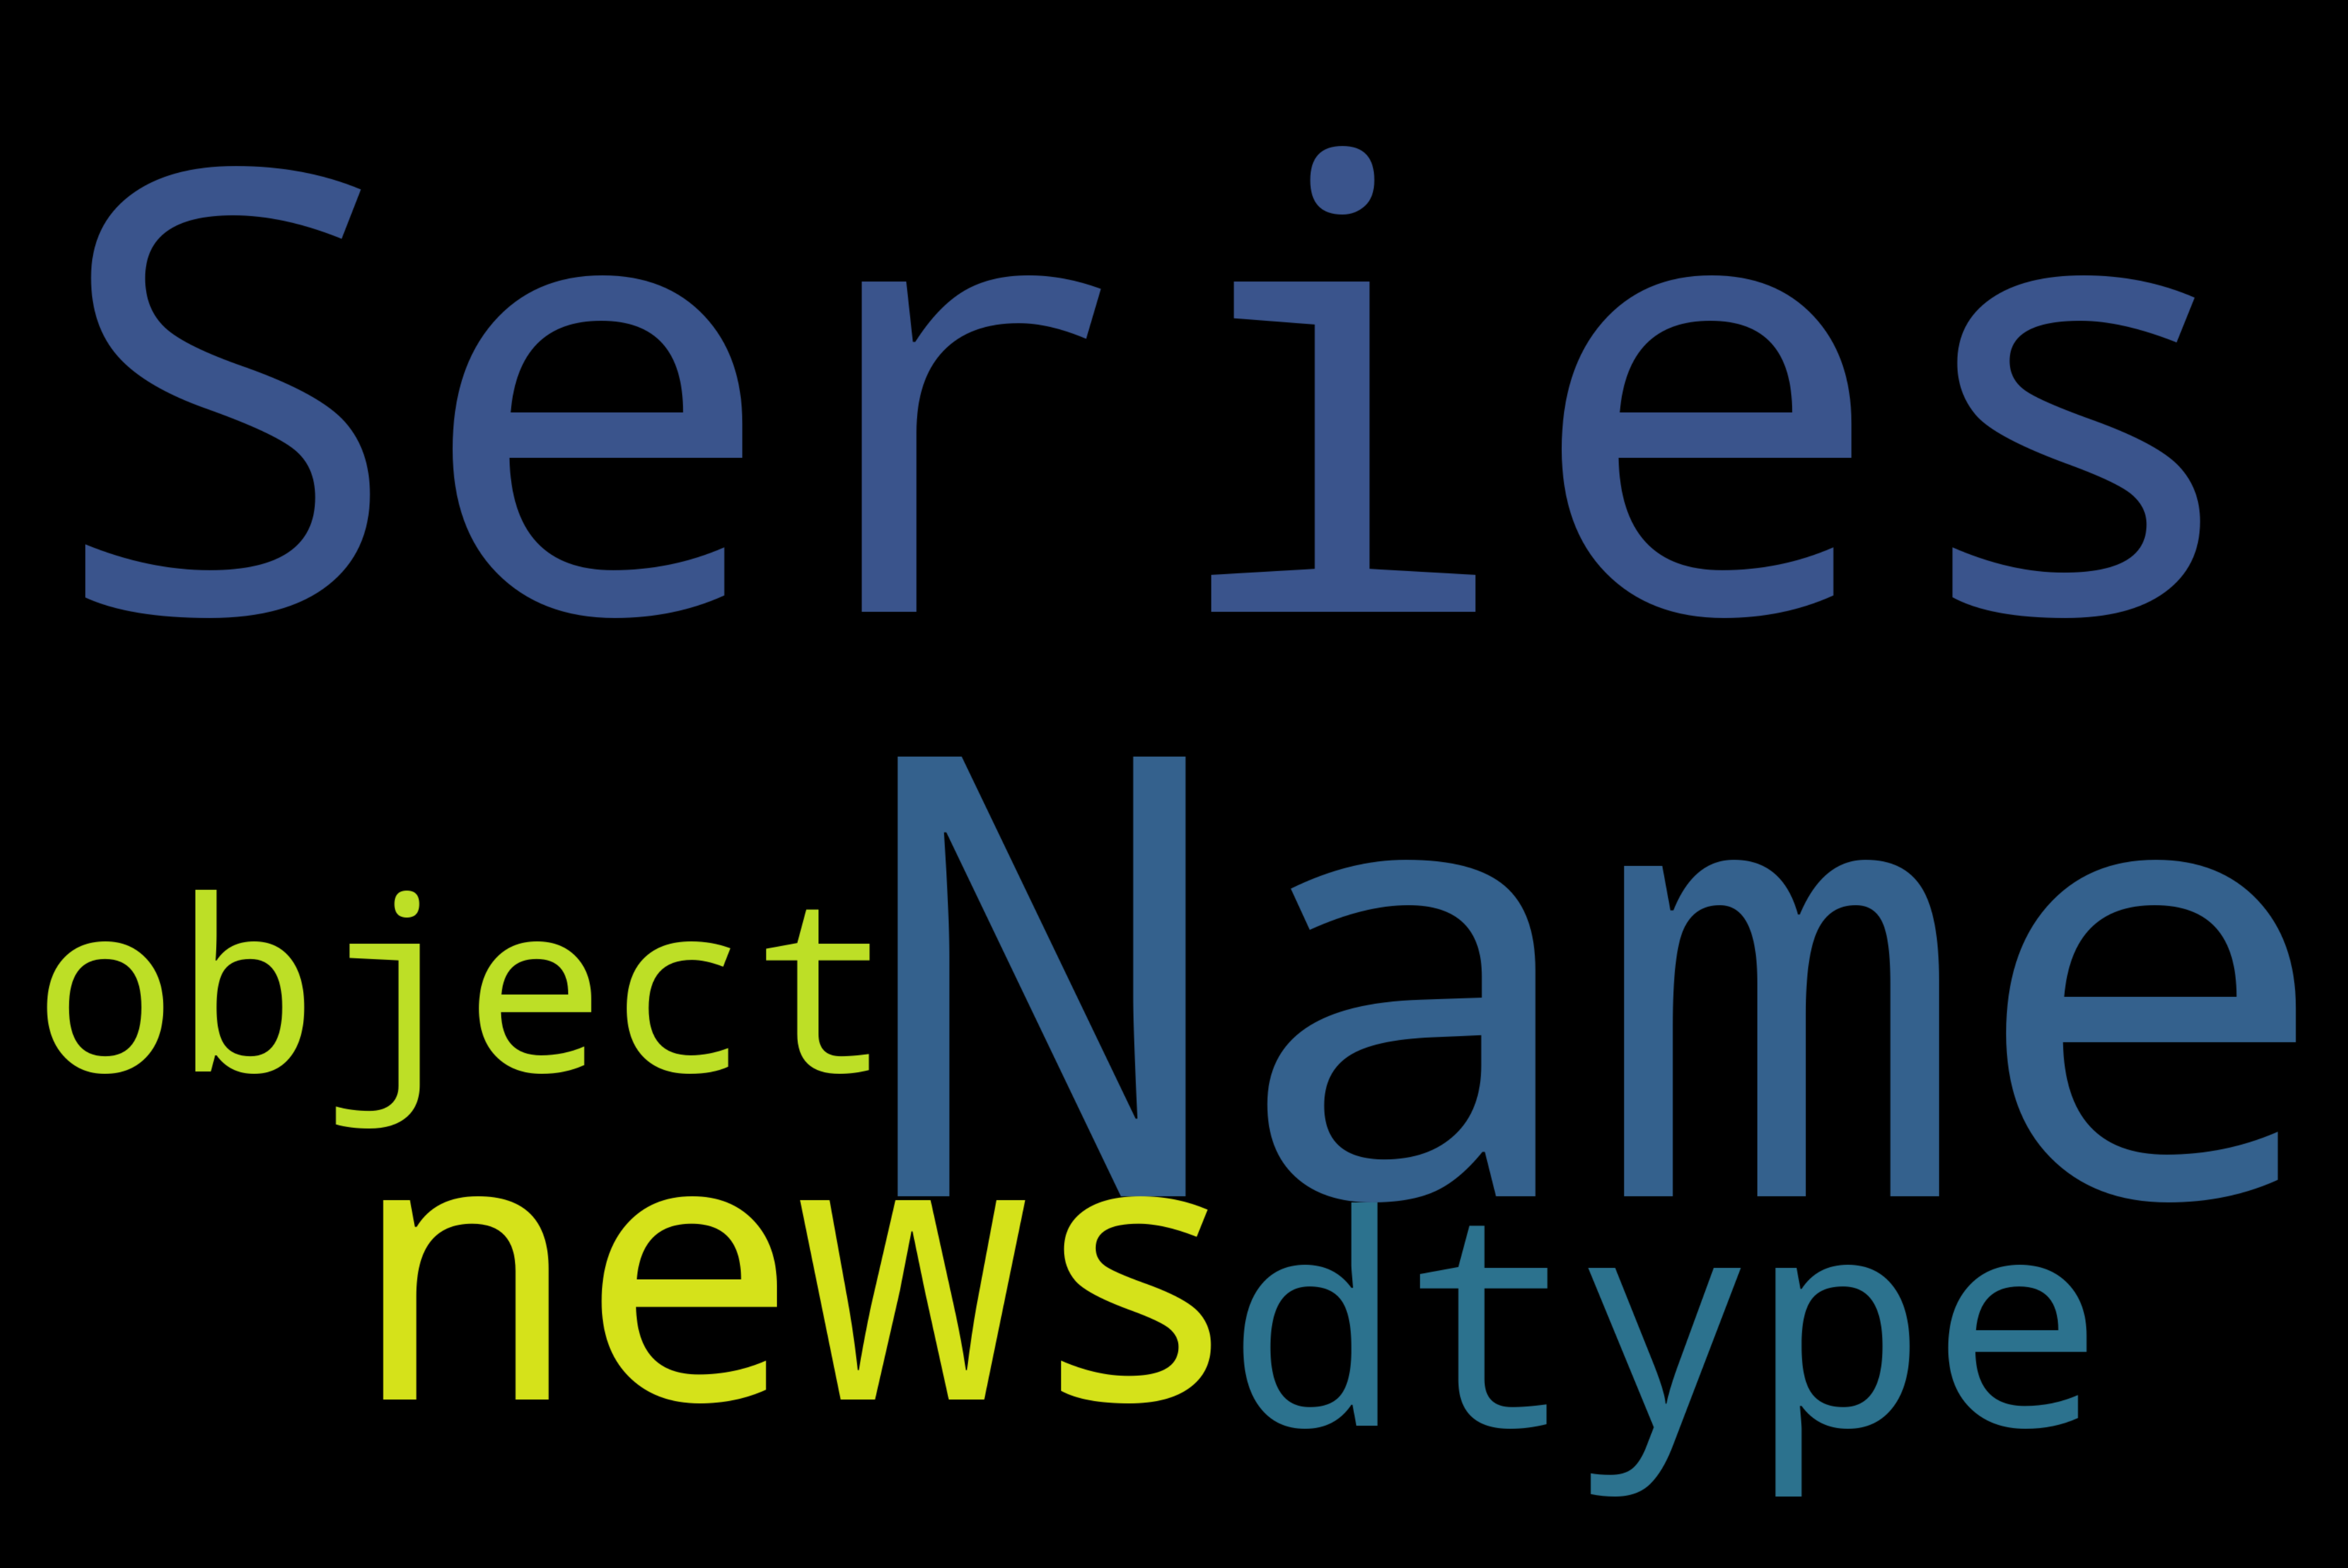

In [0]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt
text = X_fake
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# ***Tokenizing, Removing Stop Words, Steaming and Lemmatizing***

In [0]:
stop_words = set(stopwords.words('english'))
#lemmatize and stem
ps = PorterStemmer()
lem = WordNetLemmatizer()

corpus=[]


i=0
for i in range(len(df)):
    text = df.news.iloc[i]
    text = text.lower() #changes evrything lower case
    nopunct_text = re.sub('[^a-z0-9]',' ',text) #remove non alphanumeric characters
    tokens = WhitespaceTokenizer().tokenize(nopunct_text)
    filtered = [ps.stem(lem.lemmatize(w)) for w in tokens if w not in stop_words]
    filtered_text=' '.join(filtered)
    corpus.append(filtered_text)
	

y=df.Label
X=corpus


# ***TF_IDF for Machine Learning Algrithms***

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf= TfidfVectorizer()
X_s=tfidf.fit_transform(corpus).toarray()
word_list=tfidf.vocabulary_ #feature arrangements is alphabetric
y_s=df.Label.values #to change it to numpy

#splitting
X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_s,y_s,test_size=0.2,random_state=0)

# ***Logistic Regression***

In [0]:
#classifying using Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_s_train, y_s_train)
train_score_LR=clf.score(X_s_train, y_s_train)
test_score_LR=clf.score(X_s_test, y_s_test)
print(train_score_LR)
print(test_score_LR)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.990909090909091
0.981203007518797


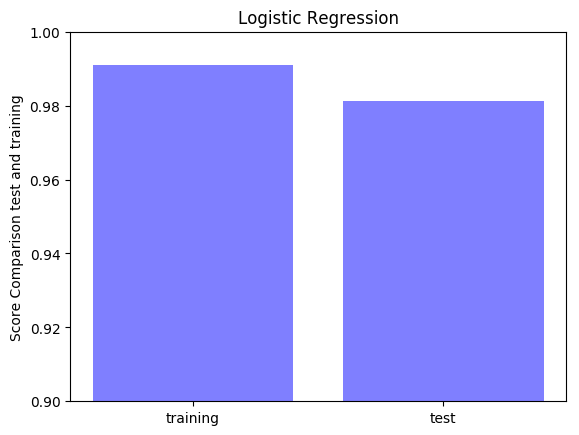

In [0]:
plt.rcdefaults()
objects = ('training', 'test')
y_pos = np.arange(len(objects))
   
SCORE_DE = [train_score_LR, test_score_LR]
plt.bar(y_pos, SCORE_DE, align='center', alpha=0.5, color = 'blue')
plt.xticks(y_pos, objects)
#ax=plt.gca()
plt.ylim(0.90, 1)
plt.ylabel('Score Comparison test and training')
plt.title('Logistic Regression')
plt.show()

# ***Random Forest***

In [0]:
from sklearn.ensemble import RandomForestClassifier
#rf=RandomForestClassifier(max_depth=3)
rf=RandomForestClassifier(max_depth=25)
rf.fit(X_s_train, y_s_train)
test_score_rf=rf.score(X_s_test, y_s_test)
train_score_rf=rf.score(X_s_train, y_s_train)
print(train_score_rf)
print(test_score_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.990282131661442
0.956140350877193


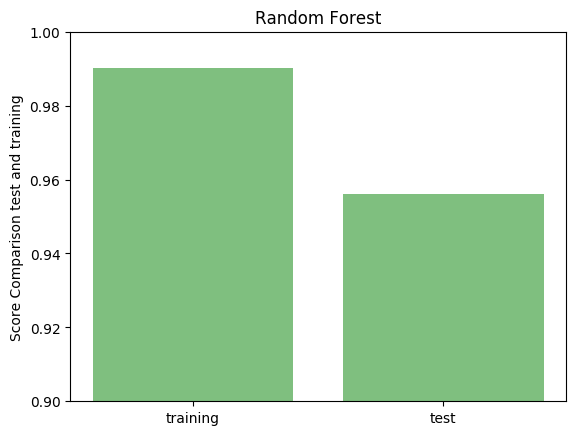

In [0]:
plt.rcdefaults()
objects = ('training', 'test')
y_pos = np.arange(len(objects))
   
SCORE_DE = [train_score_rf, test_score_rf]
plt.bar(y_pos, SCORE_DE, align='center', alpha=0.5, color = 'green')
plt.xticks(y_pos, objects)
#ax=plt.gca()
plt.ylim(0.90, 1)
plt.ylabel('Score Comparison test and training')
plt.title('Random Forest')
plt.show()

# ***KNN***

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_s_train, y_s_train) 
test_score_knn=knn.score(X_s_test, y_s_test)
train_score_knn=knn.score(X_s_train, y_s_train)
print(train_score_knn)
print(test_score_knn)

In [0]:
plt.rcdefaults()
objects = ('training', 'test')
y_pos = np.arange(len(objects))
   
SCORE_DE = [train_score_rf, test_score_rf]
plt.bar(y_pos, SCORE_DE, align='center', alpha=0.5, color = 'green')
plt.xticks(y_pos, objects)
#ax=plt.gca()
plt.ylim(0.90, 1)
plt.ylabel('Score Comparison test and training')
plt.title('Random Forest')
plt.show()

# ***Deep Learning - Recurrent Neural Network***

# ***Splitting the Data Frame***

In [0]:
df.Label = df.Label.map({1:'yes', 0: 'no'})
df.Label=df.Label.astype(str)
y=df.Label

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
vocab_size = 5000
embedding_dim = 16
max_length = 5000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8


In [0]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(X_train)
train_padded=pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)


label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)
#
training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

# GRU Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 16)          80000     
_________________________________________________________________
bidirectional (Bidirectional (No

In [0]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Train on 396 samples, validate on 100 samples
Epoch 1/10
396/396 - 244s - loss: 0.5037 - acc: 0.4848 - val_loss: 0.2987 - val_acc: 0.6200
Epoch 2/10
396/396 - 244s - loss: -1.1911e-01 - acc: 0.4848 - val_loss: -4.9299e-01 - val_acc: 0.6200
Epoch 3/10
396/396 - 243s - loss: -1.8377e+00 - acc: 0.4848 - val_loss: -3.2873e+00 - val_acc: 0.6200
Epoch 4/10
396/396 - 244s - loss: -8.5344e+00 - acc: 0.4848 - val_loss: -9.1494e+00 - val_acc: 0.6200
Epoch 5/10
396/396 - 246s - loss: -1.4313e+01 - acc: 0.4848 - val_loss: -1.2146e+01 - val_acc: 0.6200
Epoch 6/10
396/396 - 246s - loss: -1.7950e+01 - acc: 0.4848 - val_loss: -1.4672e+01 - val_acc: 0.6200
Epoch 7/10
396/396 - 244s - loss: -2.1261e+01 - acc: 0.4848 - val_loss: -1.7026e+01 - val_acc: 0.6200
Epoch 8/10
396/396 - 243s - loss: -2.4417e+01 - acc: 0.4848 - val_loss: -1.9357e+01 - val_acc: 0.6200
Epoch 9/10
396/396 - 243s - loss: -2.7626e+01 - acc: 0.4848 - val_loss: -2.1681e+01 - val_acc: 0.6200
Epoch 10/10
396/396 - 243s - loss: -3.0830e+01

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 16)          80000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 80,558
Trainable params: 80,558
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 50
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 3190 samples, validate on 798 samples
Epoch 1/50
3190/3190 - 2s - loss: 1.5070 - acc: 0.5072 - val_loss: 1.0513 - val_acc: 0.4561
Epoch 2/50
3190/3190 - 1s - loss: 0.8087 - acc: 0.5047 - val_loss: 0.7180 - val_acc: 0.5439
Epoch 3/50
3190/3190 - 2s - loss: 0.7075 - acc: 0.5408 - val_loss: 0.6983 - val_acc: 0.5439
Epoch 4/50
3190/3190 - 1s - loss: 0.6960 - acc: 0.5285 - val_loss: 0.6911 - val_acc: 0.5439
Epoch 5/50
3190/3190 - 2s - loss: 0.6916 - acc: 0.5451 - val_loss: 0.6878 - val_acc: 0.5451
Epoch 6/50
3190/3190 - 1s - loss: 0.6885 - acc: 0.5636 - val_loss: 0.6850 - val_acc: 0.5627
Epoch 7/50
3190/3190 - 2s - loss: 0.6841 - acc: 0.5555 - val_loss: 0.6796 - val_acc: 0.5639
Epoch 8/50
3190/3190 - 1s - loss: 0.6788 - acc: 0.5831 - val_loss: 0.6737 - val_acc: 0.6090
Epoch 9/50
3190/3190 - 1s - loss: 0.6716 - acc: 0.5966 - val_loss: 0.6639 - val_acc: 0.5752
Epoch 10/50
3190/3190 - 2s - loss: 0.6596 - acc: 0.6564 - val_loss: 0.6479 - val_acc: 0.6216
Epoch 11/50
3190/3190 - 1s - los

# ***Word Embedding Generator Visualization Files***

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# ***Result Visuaization***